In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import os

### Importing data


In [2]:
# Set current directory
curr_dir = os.getcwd()

# Load the dataset
f_path = os.path.join(curr_dir, "cancer patient data sets.csv")
data = pd.read_csv(f_path)
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Selecting informative features and the target variables


In [3]:
features = [
    'Age', 'Alcohol use', 'Smoking', 'chronic Lung Disease', 'Fatigue', 'Coughing of Blood', 'Chest Pain', 'Genetic Risk', 'OccuPational Hazards', 'Shortness of Breath', 'Weight Loss', 'Clubbing of Finger Nails', 'Dry Cough', 'Wheezing'
]
target = 'Level'

X = data[features]
y = data[target]

### Splitting the data into training and testing sets


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Boosting Decision Tree (GBDT)

GBDT is an ensemble learning method used for both classification and regression tasks. They work by combining multiple weak learners, typically decision trees, to create a strong predictive model. <br>

*GBDT Algorithm:*
- Decision Trees as Weak Learners: The base learners (weak learners) in a GBDT model are usually decision trees. 
- Gradient Boosting: Fitting the new tree to the residuals (the differences between the actual and predicted values) of the previous tree.
- Gradient Descent Optimization: Iteratively fits a new tree to the negative gradient of the loss function with respect to the predicted values. 
- Shrinkage (Learning Rate): Control the contribution of each tree to the ensemble

*Parameters:*
- n_estimators: Number of trees in the ensemble
- learning_rate: Shrinkage parameter
- max_depth: Maximum depth of the individual trees
- min_samples_split: Minimum number of samples required to split an internal node
- min_samples_leaf: Minimum number of samples required to be at a leaf node
- subsample: Fraction of samples to be used for fitting the individual trees


#### Training Model

To train a Gradient Boosting Classifier with optimal hyperparameters using scikit-learn's GridSearchCV, we start by defining a parameter grid containing various hyperparameter values to search over. These hyperparameters include the number of boosting stages (**n_estimators**), the learning rate (**learning_rate**), the maximum depth of the individual regression estimators (**max_depth**), the minimum number of samples required to split an internal node (**min_samples_split**), the minimum number of samples required to be at a leaf node (**min_samples_leaf**), and the fraction of samples used for fitting the individual base learners (**subsample**.

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100], 
    'learning_rate': [0.05, 0.1],  
    'max_depth': [3, 5],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'subsample': [0.8, 0.9, 1.0]  
}

# Initialize the GBDT model
gbdt_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search - assuming X_train and y_train are defined
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy: 1.0


After fitting the grid search object to the training data (**'X_train'** and **'y_train'**), we retrieve the best estimator found by accessing the **'best_estimator_'** attribute of the **'grid_search'** object. This **'best_gb_estimator'** instance represents the Gradient Boosting Classifier with the optimal hyperparameters identified through the grid search.

#### Gradient Boosting Classifier
Initialize a new model with these hyperparameters and then train it on our data.<br>
Once the model is trained, we cna use it to make predictions. 

In [16]:
gbdt_model = GradientBoostingClassifier(learning_rate=0.05, 
                                           max_depth=3, 
                                           min_samples_leaf=1, 
                                           min_samples_split=2, 
                                           n_estimators=50, 
                                           subsample=0.8,
                                           random_state=42)
gbdt_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42,
                           subsample=0.8)

In [17]:
y_pred = gbdt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


The GBDT model with hyperparameter tuning also predicts "Low", "Medium" and "High" Levels of Lung Cancer in patients with an Accuracy of 1.0. <br>
Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. It measures the overall correctness of the model's predictions across all classes.

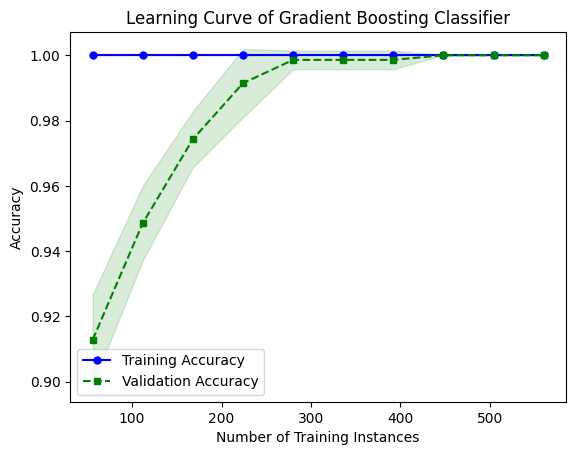

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbdt_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of Training Instances')
plt.ylabel('Accuracy')
plt.title('Learning Curve of Gradient Boosting Classifier')
plt.legend()
plt.show()


Learning curve of the Gradient Boosting Classifier using cross-validation and plot the training and validation accuracy as a function of the number of training instances.



In [11]:
# Cross-validation
cv_scores = cross_val_score(gbdt_model, X, y, cv=5, scoring='accuracy')
print(f'CV Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')

CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


The accuracy scores obtained for each fold of the cross-validation process is 1.0, it suggests that the model achieved perfect accuracy on each fold of the cross-validation. A perfect accuracy score of 1.0 means that the model correctly classified all instances in the validation set for that fold.

#### Classification Report

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       119
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Precision: TP / TP+FP <br>
Recall: TP / TP+FN <br>
F1-score: 2(Precision * Recall)/ Precision + Recall <br>
Support: Number of actual occurrences of each class in the dataset.

In [13]:
# Displaying the importance of each feature
feature_importance = pd.DataFrame(gbdt_model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

                          importance
Coughing of Blood           0.282139
Fatigue                     0.160009
Alcohol use                 0.150196
Wheezing                    0.142269
Smoking                     0.106413
Age                         0.039293
OccuPational Hazards        0.035426
Clubbing of Finger Nails    0.035293
Chest Pain                  0.022061
chronic Lung Disease        0.011044
Dry Cough                   0.008190
Shortness of Breath         0.003021
Weight Loss                 0.002713
Genetic Risk                0.001934


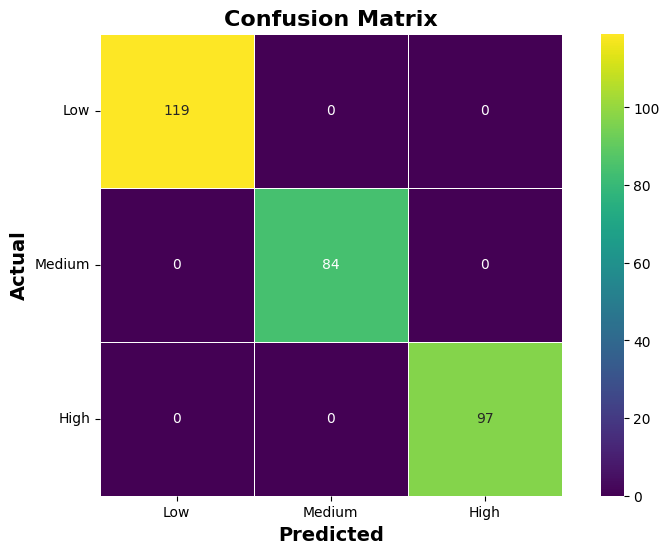

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium","High"],
    yticklabels=["Low", "Medium","High"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()